In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

from IPython.display import clear_output, display
import evolutionaryAlgorithm
import functions
import population
import specimen

# Testy inicializacji macierzy

In [18]:
def test_time_of_generate_specimen(max_generated_value, list_of_size):
    times = []
    for s in list_of_size:
        problem_matrix = np.random.randint(low=0, high=max_generated_value, size=(s, s))
        
        start = time.time()
        S = specimen.Specimen(problem_matrix)
        S.initialize_matrix_change()
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("max value:",max_generated_value, " size of problem: {0}".format(s))
    return times

def plot_time_generate_specimen(max_generated_values):
    list_of_size = [x for x in list(dict.fromkeys(np.logspace(0, 3, 200).astype('uint32')))[2:] if x < 150]
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for max_value in max_generated_values:
        times = test_time_of_generate_specimen(max_value, list_of_size)

        pl.plot(list_of_size, times, label="max_value: {0}".format(max_value))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()
    
def semilogy_time_generate_specimen(max_generated_values):
    list_of_size = [x for x in list(dict.fromkeys(np.logspace(0, 3, 200).astype('uint32')))[2:] if x < 150]
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for max_value in max_generated_values:
        times = test_time_of_generate_specimen(max_value, list_of_size)

        pl.semilogy(list_of_size, times, label="max_value: {0}".format(max_value))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()   

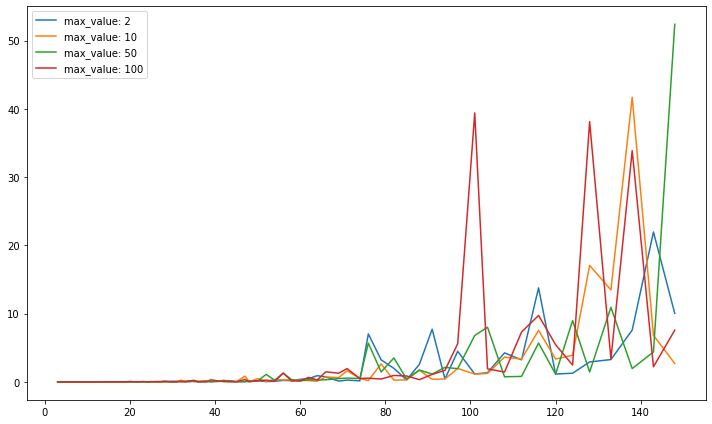

In [16]:
plot_time_generate_specimen([2, 10, 50, 100])

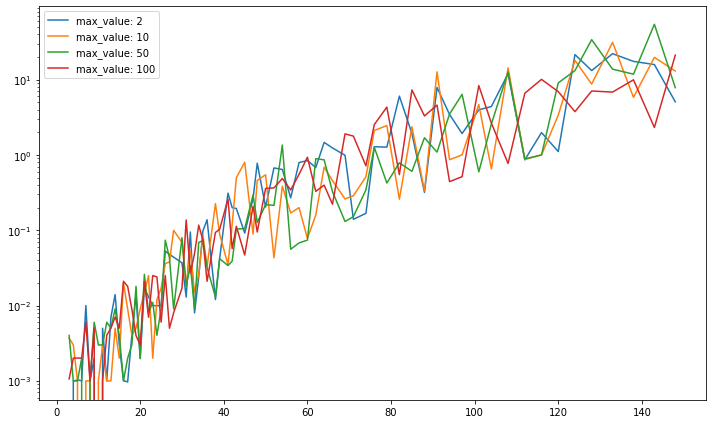

In [19]:
semilogy_time_generate_specimen([2, 10, 50, 100])

In [4]:
def test_time_of_generate_specimen_for_difrent_value(max_generated_values):
    times = []
    for mgv in max_generated_values:
        problem_matrix = np.random.randint(low=0, high=mgv, size=(20, 20))
        
        start = time.time()
        S = specimen.Specimen(problem_matrix)
        S.initialize_matrix_change()
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("max value: ",mgv)
    return times

def plot_time_generate_specimen2(sample):
    max_generated_values = list(dict.fromkeys(np.linspace(0, 1e8, 500).astype('uint32')))[2:]
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for s in range(sample):
        times = test_time_of_generate_specimen_for_difrent_value(max_generated_values)
        pl.plot(max_generated_values, times, '.', label="sample: {}".format(s))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(2.0)
        
    plt.legend()
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()

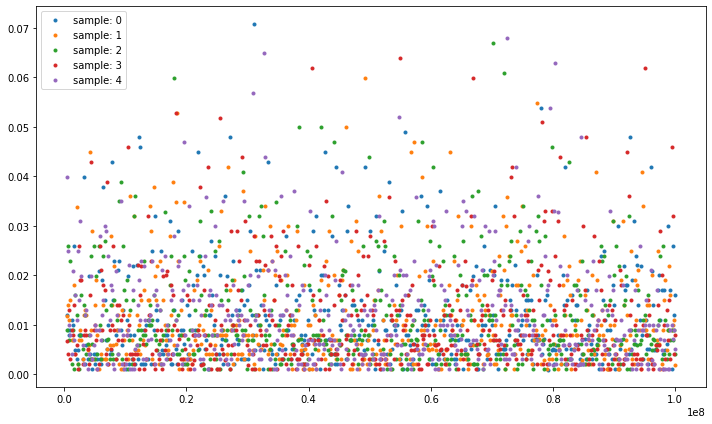

In [17]:
plot_time_generate_specimen2(sample=5)

# Test mutacji 

In [45]:
def test_time_of_mutation(max_generated_value, list_of_size):
    times = []
    for s in list_of_size:
        problem_matrix = np.random.randint(low=0, high=max_generated_value, size=(s, s))
        
        
        S = specimen.Specimen(problem_matrix)
        P = population.Population(1)
        start = time.time()
        P.elementary_mutation(S, rows_number=2, cols_number=2)
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("max value:",max_generated_value, " size of problem: {0}".format(s))
    return times

def plot_time_mutation(max_generated_values):
    list_of_size = list(dict.fromkeys(np.logspace(1, 4, 100).astype('uint32')))
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for max_value in max_generated_values:
        times = test_time_of_mutation(max_value, list_of_size)

        pl.plot(list_of_size, times, '.', label="max_value: {0}".format(max_value))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.tight_layout()
    plt.title("czas[wielkość osobnika] dla stałego mutagenu 2x2")
    clear_output(wait=True)
    plt.show()

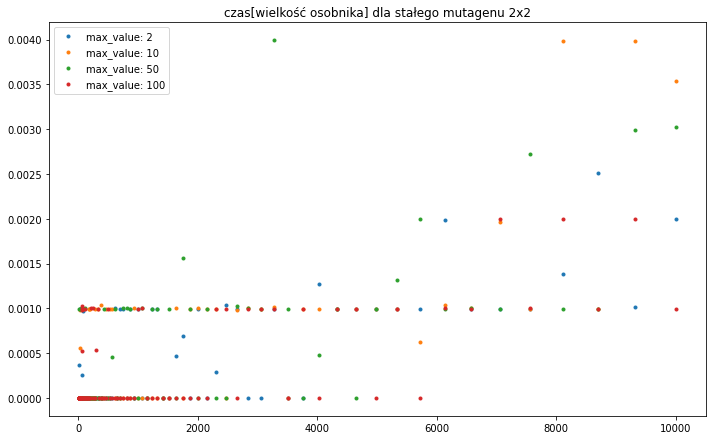

In [46]:
plot_time_mutation([2, 10, 50, 100])

In [6]:
def test_time_of_mutation_for_different_mutagene(size_of_specimen, mutation_size):
    times = []
    problem_matrix = np.random.randint(low=0, high=100, size=(size_of_specimen, size_of_specimen))
    
    for s in mutation_size:
        S = specimen.Specimen(problem_matrix)
        P = population.Population(1)
        start = time.time()
        P.elementary_mutation(S, rows_number=s, cols_number=s)
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("size_of_specimen:", size_of_specimen, " size of mutagen: {0} x {0}".format(s))
    return times

def plot_time_diffrent_mutagene(sizes_of_specimens):
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    mutation_size = list(dict.fromkeys(np.linspace(2, sizes_of_specimens[0]/2, 50).astype('uint32')))
    for size_of_specimen in sizes_of_specimens:
        times = test_time_of_mutation_for_different_mutagene(size_of_specimen, mutation_size)

        pl.plot(mutation_size, times, label="size of specimen: {0}".format(size_of_specimen))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.tight_layout()
    plt.title("czas[rozmiar mutagenu] dla różnego rozmiaru osobnika")
    clear_output(wait=True)
    plt.show()


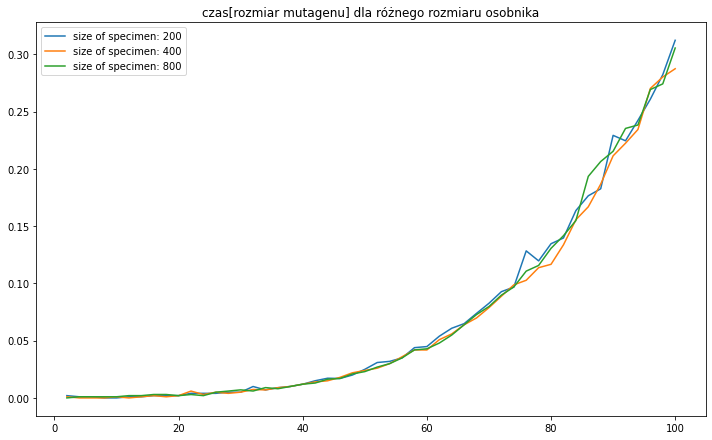

In [8]:
plot_time_diffrent_mutagene([200, 400, 800])

In [213]:
size_ = 100
problem_matrix = np.random.randint(low=0, high=10, size=(size_, size_))
rows_numbers = np.linspace(2, int(size_/2), int(size_/2)-1).astype('uint32')
cols_numbers = np.linspace(2, int(size_/2), int(size_/2)-1).astype('uint32')

qualites = []
for c in cols_numbers:
    qualities_col = []
    for r in rows_numbers:
        P = population.Population(1)
        S1 = specimen.Specimen(problem_matrix)
        start_quality = S1.quality()
        mutate_specimen = P.elementary_mutation(S1, rows_number=r, cols_number=c)
        
        S2 = specimen.Specimen(mutate_specimen)
        end_quality = S2.quality()
        qualities_col.append(end_quality-start_quality)
        
    qualites.append(qualities_col)

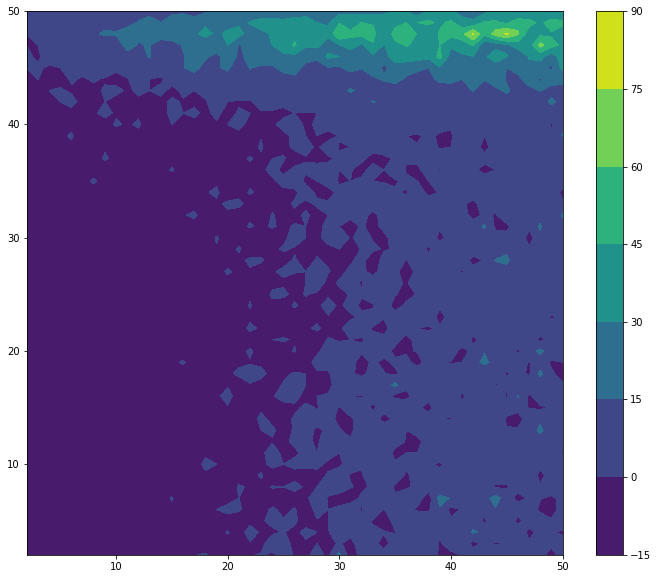

In [215]:
fig = plt.figure(figsize=[12,10])
X, Y = np.meshgrid(rows_numbers, cols_numbers[::-1])
Z = np.array(qualites)

plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()